In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys

%aimport utils
%aimport analyzers
%aimport processor
%aimport forecast
%aimport models

In [107]:
# Predictions Locations
prediction_folder = 'C://Users//l5453//GoogleDrive//GroupWorks//Term4-AFP//forecasts//Predictions'
RR_Norm_Prediction_Path = os.path.join(prediction_folder, '3ff', 'RR_norm_p1y.csv')
# GBM_Prediction_Path = os.path.join(prediction_folder, 'archived', 'RGBM_norm.csv')
LightGBM_Prediction_Path = os.path.join(prediction_folder, '3ff', 'RLGBM_norm_daily_p1y.csv')

# Analyzer Arguments
task = 'yahoo'
tickers = processor.YahooProcessor.get_all_tickers()
folder = None
freq = 'd'
fromdate = '2015-01-01'
todate = '2018-12-31'
forward_bars = 0

# Outlier Stocks
outliers = ['SAF', 'BHF']

# Plot Arguments
return_type = 'Daily Returns'

In [392]:
plotter = analyzers.Plotter(
    pred_paths=[
        RR_Norm_Prediction_Path,
#         GBM_Prediction_Path,
        LightGBM_Prediction_Path
    ], 
    item_names=[
        'RR Norm Daily Returns',
#         'GBM Daily Returns',
        'Light GBM Daily Returns'
    ],
    fromdate=fromdate, 
    todate=todate,
    rolling_metrics=['squared_error', 'RMSE'],
    label_args={
        "tickers": processor.YahooProcessor.get_all_tickers(),
#         "tickers": ['AAPL', 'AMZN'],
        "task": "yahoo",
        "forward_bars": 0,
        "freq": "d",
        "folder": None
    }
)

In [393]:
plotter.set_analyzers()

2019-03-04 02:47:13,926 -  INFO   Loading Yahoo Labels...


2019-03-04 02:47:22,444 -  INFO   Loading Meta Data at C:\Users\l5453\OneDrive\Documents\Projects\afp\yahoos\yahoo_metas.csv
2019-03-04 02:47:22,449 -  INFO   Analyzing RR Norm Daily Returns...
2019-03-04 02:47:22,449 -  INFO   Loading Predictions Files From C://Users//l5453//GoogleDrive//GroupWorks//Term4-AFP//forecasts//Predictions\3ff\RR_norm_p1y.csv


2019-03-04 02:47:34,223 -  WARNING Size Not Enough <ALLE>
2019-03-04 02:47:40,721 -  WARNING Size Not Enough <HLT>
2019-03-04 02:47:48,069 -  INFO   Task Finished: 597 Attempted and 0 Failed.
2019-03-04 02:47:48,240 -  INFO   Analyzing Light GBM Daily Returns...
2019-03-04 02:47:48,241 -  INFO   Loading Predictions Files From C://Users//l5453//GoogleDrive//GroupWorks//Term4-AFP//forecasts//Predictions\3ff\RLGBM_norm_daily_p1y.csv


2019-03-04 02:47:59,867 -  WARNING Size Not Enough <ALLE>
2019-03-04 02:48:06,375 -  WARNING Size Not Enough <HLT>
2019-03-04 02:48:13,848 -  INFO   Task Finished: 597 Attempted and 0 Failed.


## Overall Comparison

In [394]:
plotter.get_performance_table()

,(RMSE) RR Norm Daily Returns,(RMSE) Light GBM Daily Returns
count,595.000000,595.000000
mean,0.018331,0.018348
std,0.007688,0.007719
min,0.008436,0.008425
25%,0.013456,0.013453
50%,0.016037,0.016086
75%,0.020555,0.020561
max,0.078173,0.078597


In [395]:
plotter.get_performance_table('Accuracy')

,(Accuracy) RR Norm Daily Returns,(Accuracy) Light GBM Daily Returns
count,595.000000,595.000000
mean,0.504187,0.511315
std,0.019656,0.021652
min,0.437126,0.383085
25%,0.492537,0.498507
50%,0.504478,0.512438
75%,0.516418,0.525373
max,0.600000,0.600000


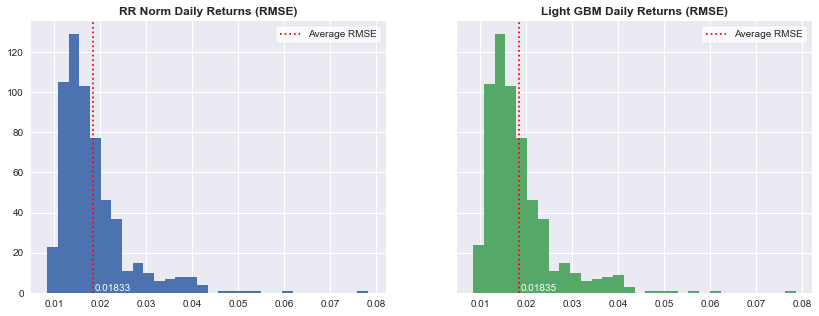

In [396]:
res = plotter.get_distribution_plot()

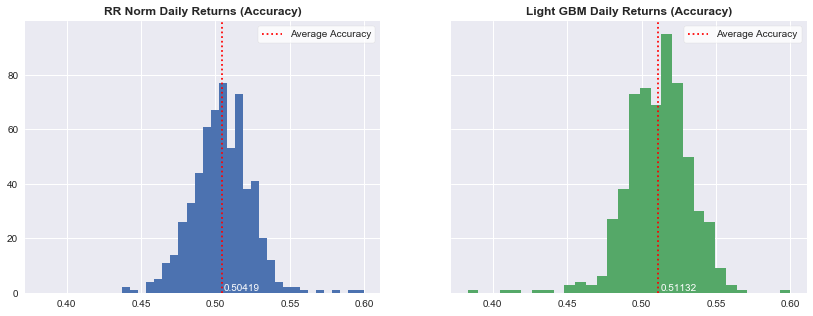

In [397]:
res = plotter.get_distribution_plot('Accuracy')

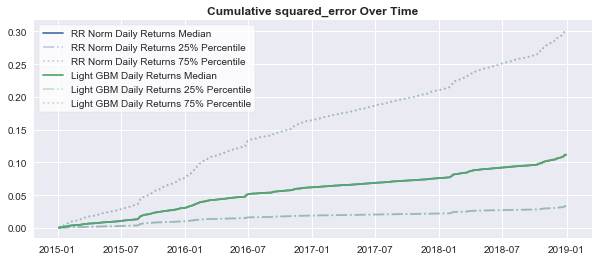

In [398]:
res = plotter.get_cumulative_metrics_plot()

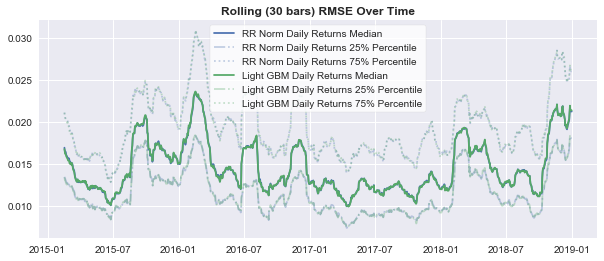

In [399]:
res = plotter.get_cumulative_metrics_plot("RMSE", q=(0.25, 0.75))

## Per Sector Comparison

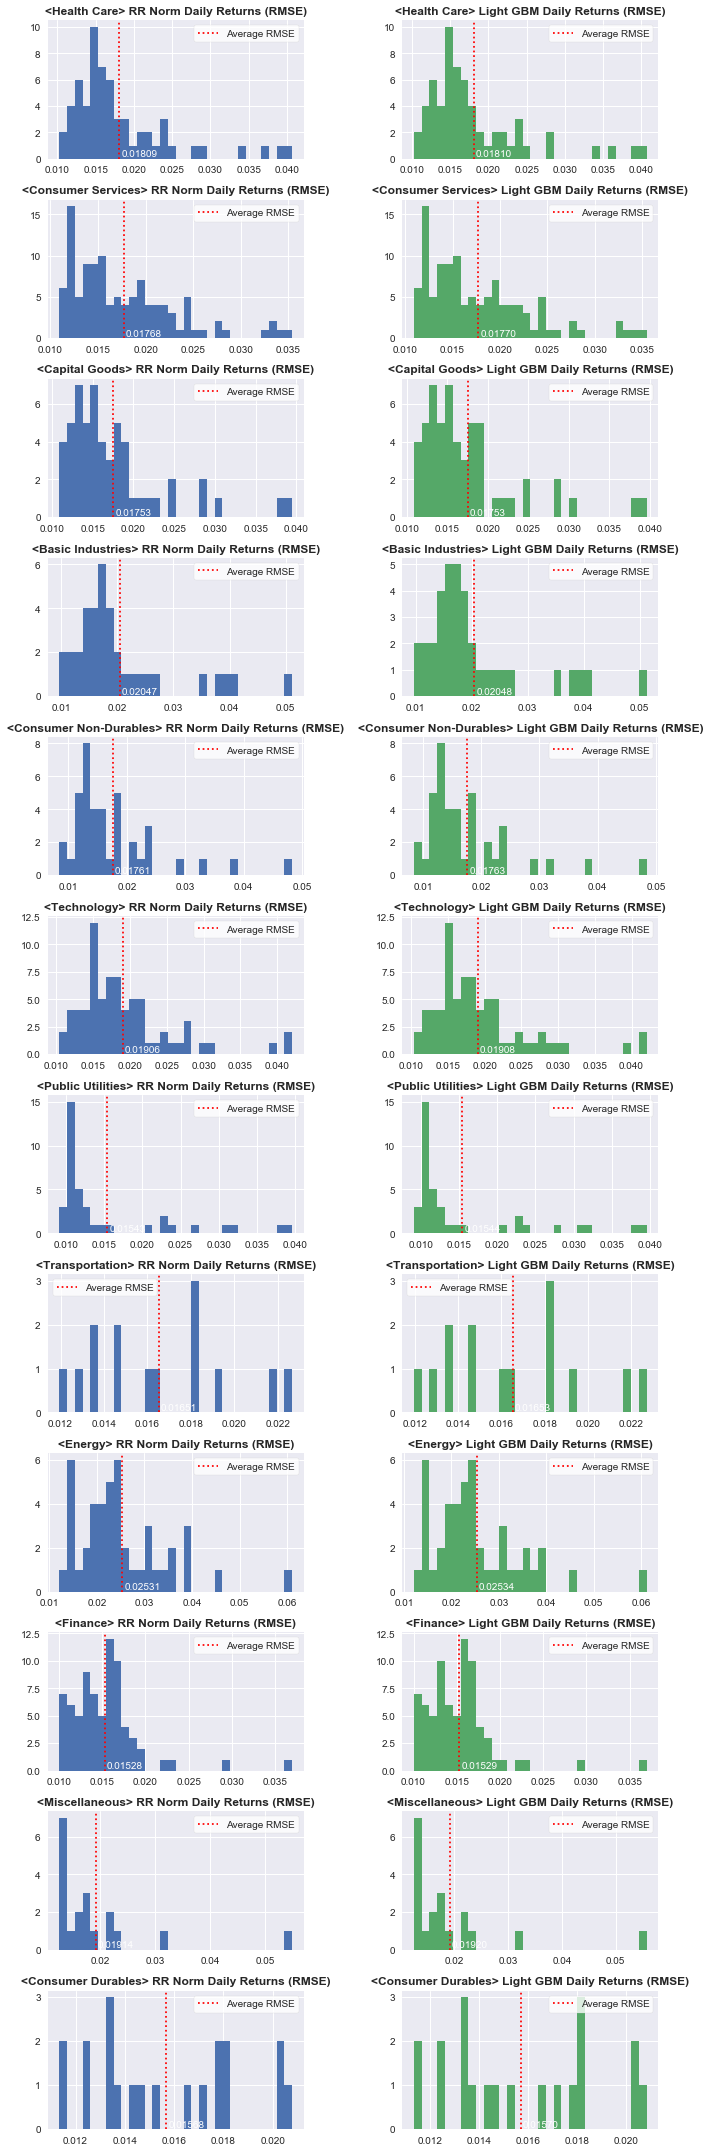

In [406]:
_ = plotter.get_sector_distributions()

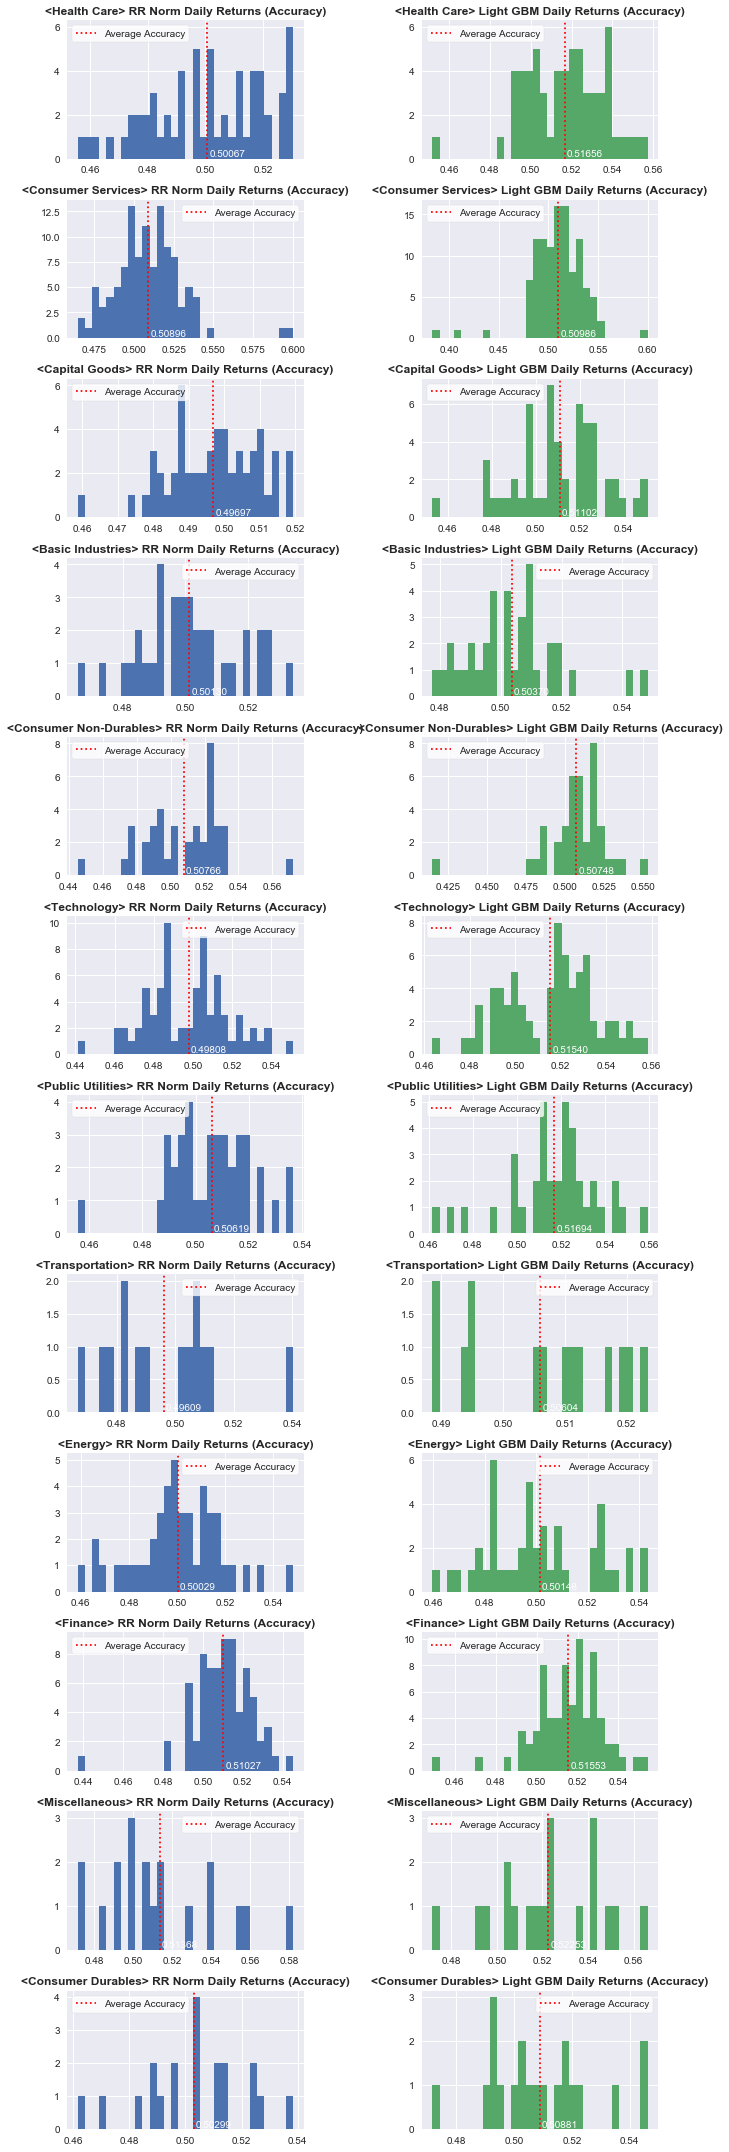

In [407]:
_ = plotter.get_sector_distributions("Accuracy")

## Market Cap Quantile Comparison

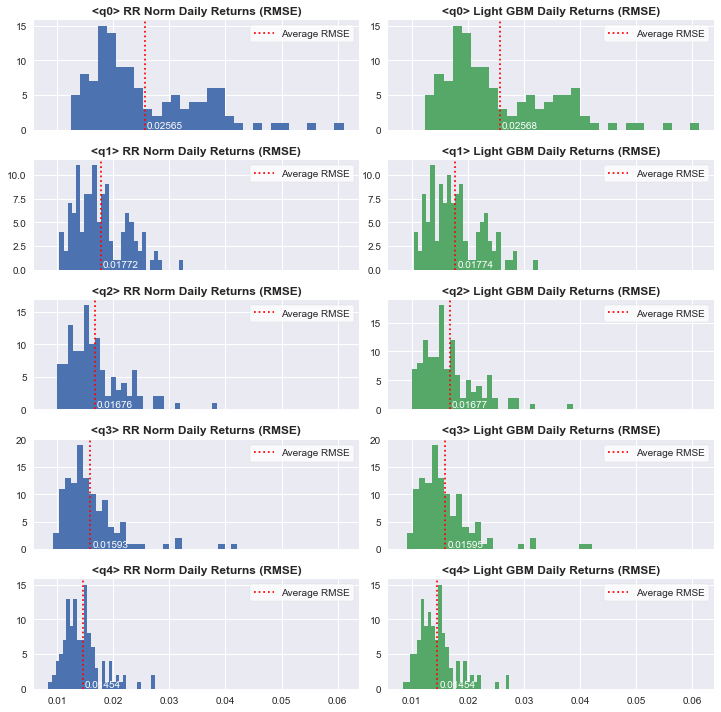

In [408]:
_ = plotter.get_marketcap_distribution()

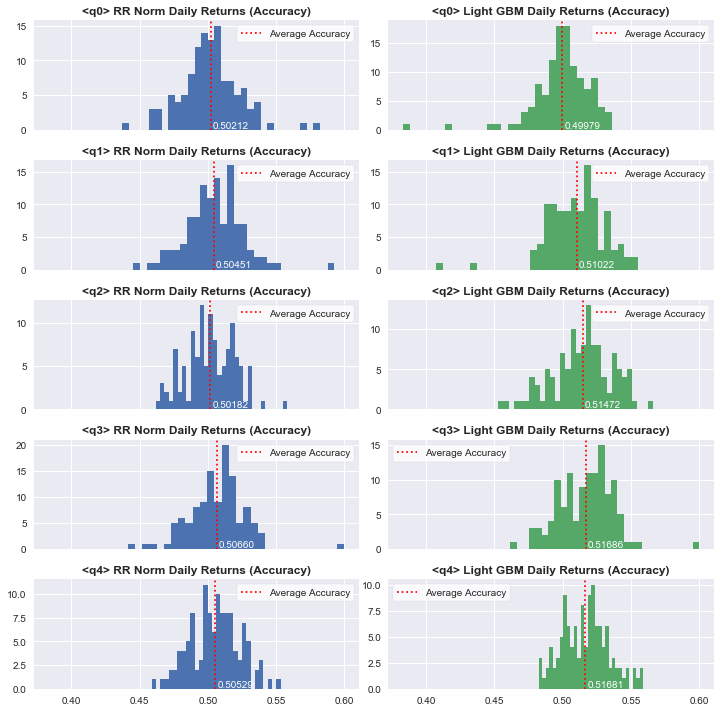

In [409]:
_ = plotter.get_marketcap_distribution("Accuracy")